In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [4]:
vgame = pd.read_csv('vgamesales.csv')
vgame.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking to see if there are any Video Games that have NaN's in their cells and dropping them

In [6]:
vgame = pd.read_csv('vgamesales.csv')
vgame.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [7]:
#Looks like the majority of these categories have atleast one NaN in them, so we will drop them

In [8]:
vgame = vgame.dropna(axis=0)
vgame.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
#Checking to see if there is any data that is misclassified or in the wrong type

In [10]:
print(vgame.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [11]:
#Looks like User_Score is an object type, so we'll change that to a float

In [12]:
vgame = vgame.convert_dtypes()
vgame['User_Score'] = vgame.User_Score.astype(float)

In [13]:
print(vgame.dtypes)

Name               string[python]
Platform           string[python]
Year_of_Release             Int64
Genre              string[python]
Publisher          string[python]
NA_Sales                  Float64
EU_Sales                  Float64
JP_Sales                  Float64
Other_Sales               Float64
Global_Sales              Float64
Critic_Score                Int64
Critic_Count                Int64
User_Score                float64
User_Count                  Int64
Developer          string[python]
Rating             string[python]
dtype: object


In [14]:
#Lets see what the data tells us at this stage
#Lets use a correlation matrix first

<Axes: >

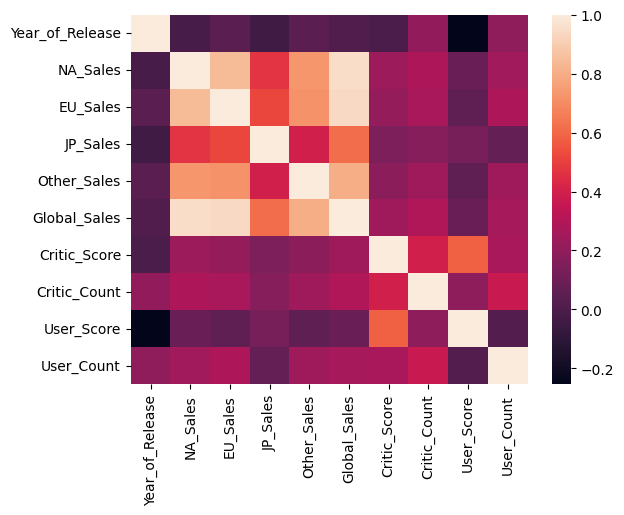

In [15]:
corr = vgame.corr(numeric_only=True)
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [16]:
#Looks like from looking at the heatmap, we can see that NA and Europe contribute the most to sales Globally, and that both NA and Europe are correlated to each other.
#Lets see what consoles sell the most

<Axes: xlabel='Year_of_Release'>

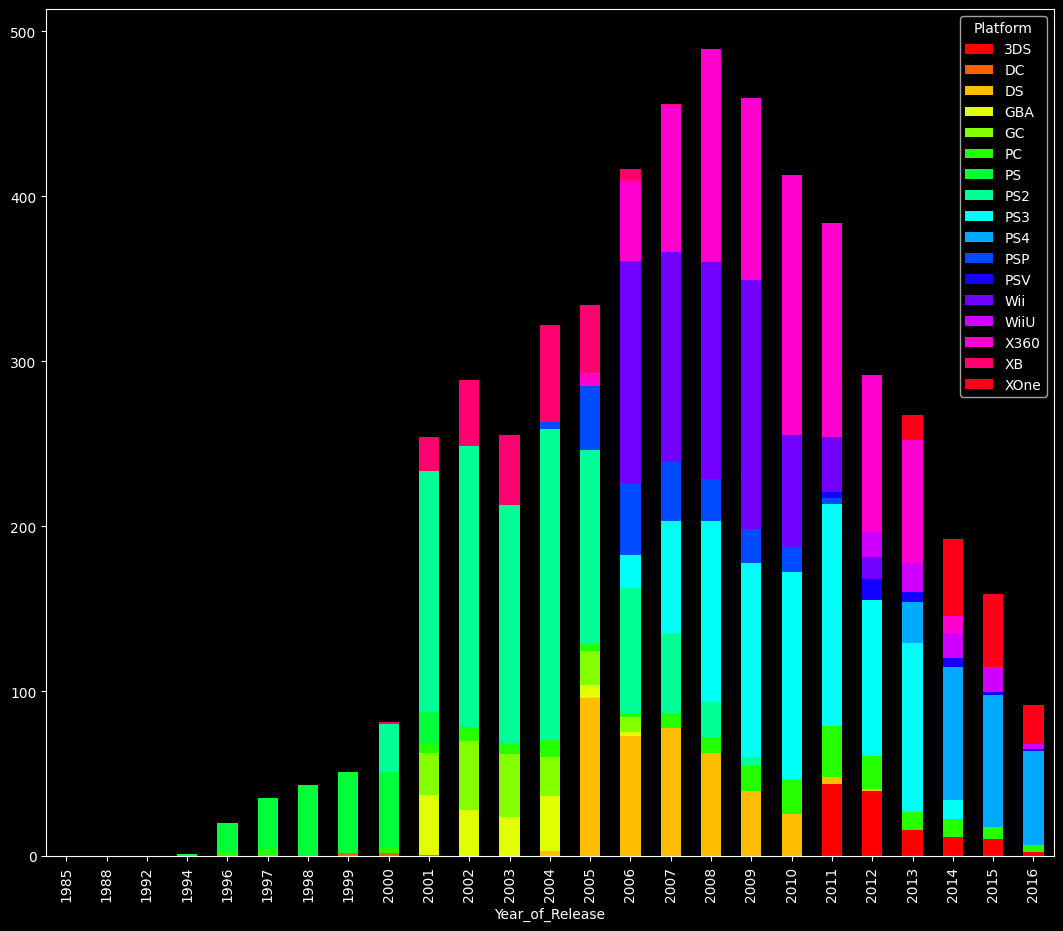

In [17]:
plt.style.use("dark_background")
yearly = vgame.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearly.unstack().plot(kind='bar',stacked=True, colormap= 'hsv',  
                           grid=False,  figsize=(13,11))

In [18]:
#We can get a few observations from here:
# - The Playstation Console Family have been a good idea of what is selling since the PS2, and the trajectory seems to be the same going into the PS4 era
# - The Nintendo Console Family have beaten the Playstation consoles when combined for a few years (2006-2009)
# - While the Xbox Consoles are generally popular with users, they don't seem to have a big impact on global sales as the other two console families do

In [19]:
#Let us look at how each genre does in terms of sales

<Axes: xlabel='Genre'>

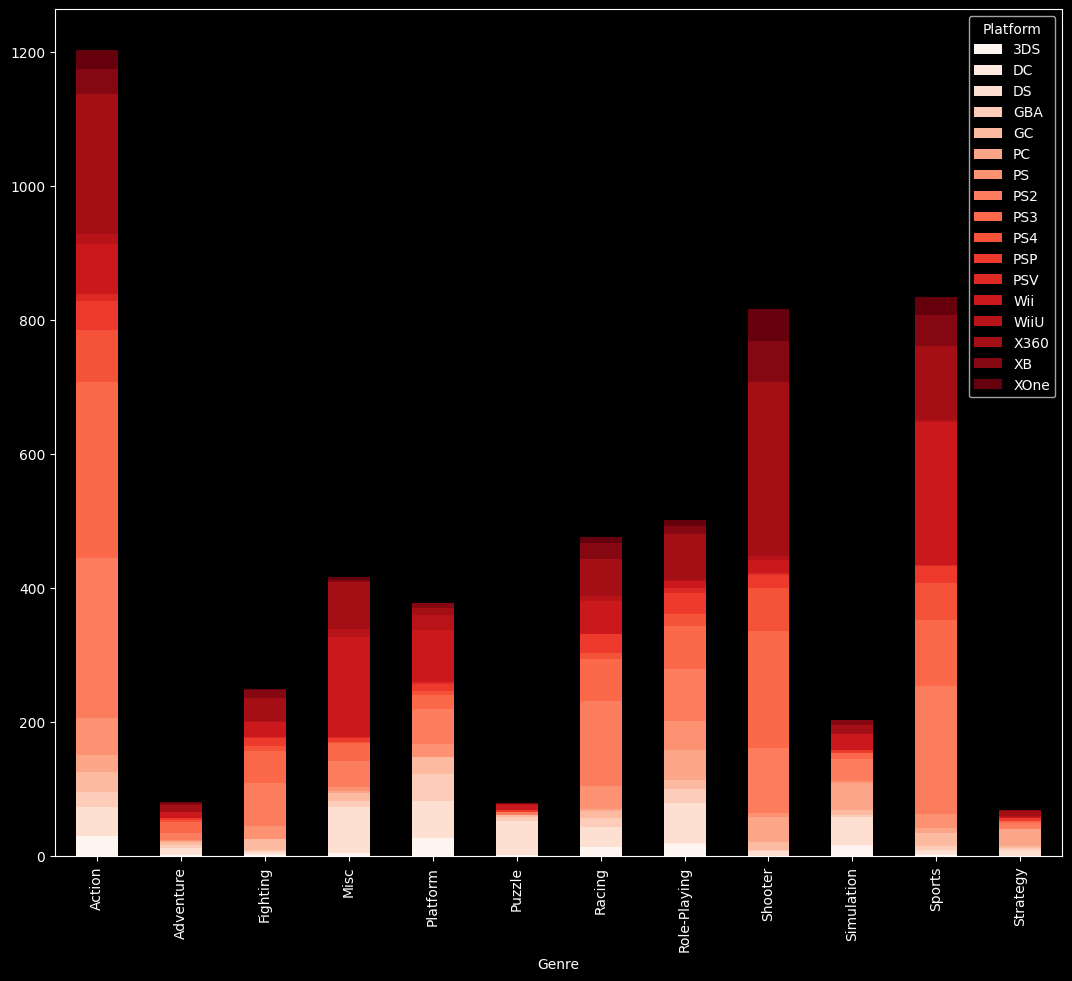

In [20]:
plt.style.use("dark_background")
genre = vgame.groupby(['Genre','Platform']).Global_Sales.sum()
genre.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds', 
                          grid=False, figsize=(13,11))

In [21]:
#We can immediately see that there are 3 contenders that have high global sales
# - Action is the clear winner, with most single-player story-driven games being in the action category, and this combo ends up being the most accessible to most gamers
# - Next up are Sports, which has an advantage by being able to be played in real life leagues using real life player's likeness, so they end up being able to bridge the gaming and sports market, as there are a lot of gamers who only play sports games
# Finally the next biggest are Shooter games. They also are able to take advantage of being single-player story games but are also able to provide a compeititve multiplayer enviroment, so they work for all gamers

In [22]:
#Let us see how Ratings affect Global Sales

<Axes: xlabel='Rating'>

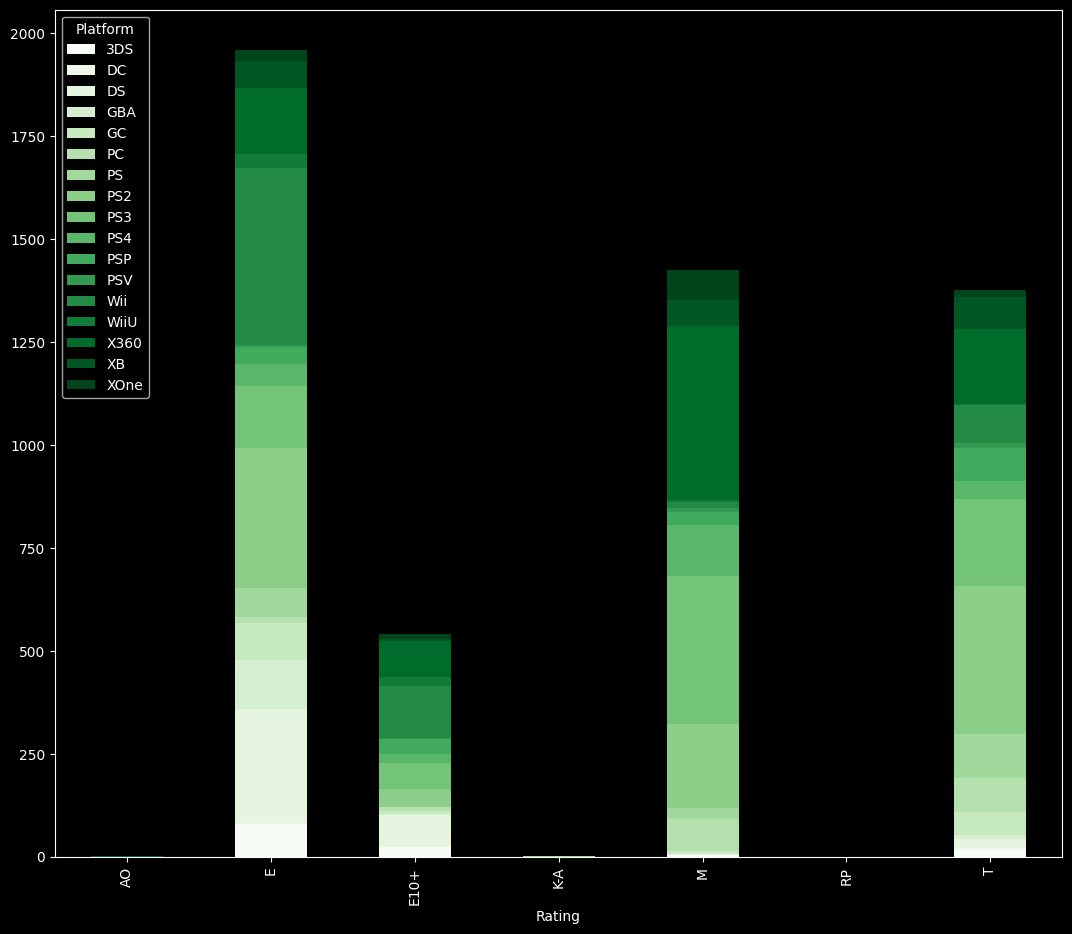

In [23]:
ratings = vgame.groupby(['Rating','Platform']).Global_Sales.sum()
ratings.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', 
                          grid=False, figsize=(13,11))

In [24]:
#We can see a mojor trend here:
# - Obviously E rated games are the most popular games on the market, but we can see a shift later on as most of the early consoles seem to have sold only E rated games. As the people who played those games grew up, they started to shift towards T and M rated games, as we can see that the later consoles bought a lot more M rated and T rated games,
# almost to the point where they're catching up to E rated games really fast.
# - M rated games are pretty much the best selling games on current consoles, where it is probably a combination of earlier gamers growing up, and more non-gamers trying out video games, which is allowing it to propel up really fast.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Select relevant features and target variable
# Did not onclude features that are encompassed in 'Global_sales' like 'EU_sales', 'NA-sales'..etc as our goal is check for the best selling games globaly
X = vgame[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']]
y = vgame['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps 
# Onehot encoder will be used for these features as they do not fit ordinal encoder criteria 
categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Here we will be using a Ordinal Encoder for the Rating feature as it is the only feature that can follow a sort of hierarchy
ordinal_features = ['Rating']
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['E', 'T', 'M', 'AO', 'E10+' , 'K-A' , 'RP']]))  # Specify the ordinal categories
])

# Combine encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ])

# Create the pipelines with preprocessing and models
linear_regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())])

decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor())])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor(random_state=42))])

knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor(n_neighbors=5))])

# Fit and evaluate each model
for model_name, model in [('Linear Regression', linear_regression_model),
                          ('Decision Tree', decision_tree_model),
                          ('Random Forest', random_forest_model),
                          ('K-Nearest Neighbors', knn_model)]:
    print(f"Model: {model_name}")
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make our predictions
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # Calculate R-squared
    train_score = r2_score(y_train, predictions_train)
    test_score = r2_score(y_test, predictions_test)
    
    # Calculate the Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, predictions_train)
    test_mse = mean_squared_error(y_test, predictions_test)
    
    # Calculate the Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(y_train, predictions_train)
    test_mae = mean_absolute_error(y_test, predictions_test)

    # Display Metrics
    print(f"Train R-squared: {train_score}")
    print(f"Test R-squared: {test_score}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print("\n")


Model: Linear Regression
Train R-squared: 0.34523932752225517
Test R-squared: 0.3702125530367534
Train MSE: 2.709600112381186
Test MSE: 1.7115493055569713
Train MAE: 0.6087811244416914
Test MAE: 0.7147321037274341


Model: Decision Tree
Train R-squared: 0.8097846299180169
Test R-squared: 0.2247126061270991
Train MSE: 0.7871694342917164
Test MSE: 2.1069689575246104
Train MAE: 0.16242533638462855
Test MAE: 0.5917563263820859


Model: Random Forest
Train R-squared: 0.7659103390134497
Test R-squared: 0.39586099376759243
Train MSE: 0.9687346818130556
Test MSE: 1.6418455171865298
Train MAE: 0.2869709770082566
Test MAE: 0.5280158484731448


Model: K-Nearest Neighbors
Train R-squared: 0.47646684210859314
Test R-squared: -0.09061721080773943
Train MSE: 2.166540482783883
Test MSE: 2.9639287648351647
Train MAE: 0.5967937728937729
Test MAE: 0.7674124542124542




In [26]:
# Based on the metrics returned from the different regression models, The Random Forest Model seems to be the best fit model for us

In [27]:
# This model achieved the highest test R-squared score meaning that it explains more of the variance in the test data compared to the other models suggesting better performance

In [28]:
# This model also yielded the lowest test Mean Squared Error demonstrating that its predictions were closest to the actual values among the models evaluated

In [29]:
# Although the Linear Regression model had a lower test Mean Absolute Error, Random Forest model still achieved a low result indicating that its predictions were close to the actual values

In [30]:
# The Random Forest Model also had comparable performances between the train and test scores for R-squared, MSE, and MAE indicating it generalizes well

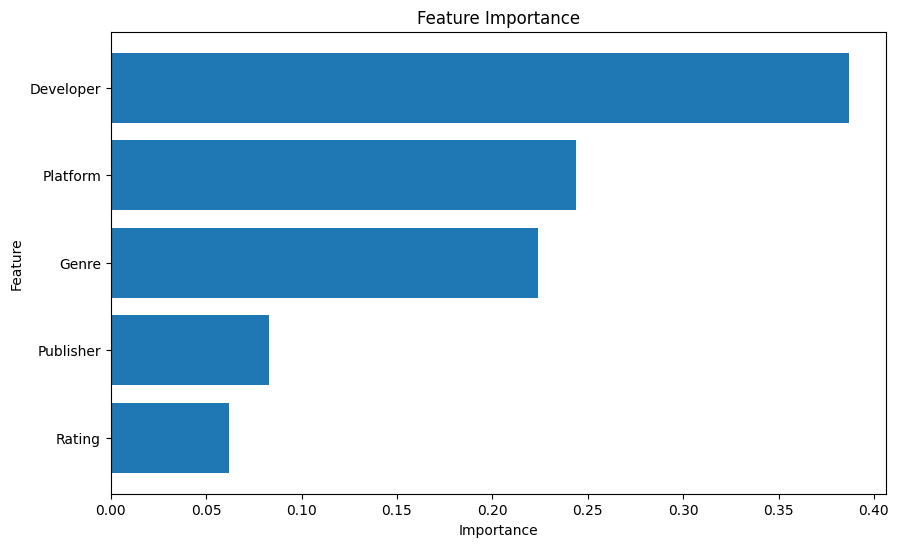

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('vgamesales.csv')

# Preprocess the data
data = data.dropna()  # Dropping missing values for simplicity

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features (X) and target (y)
X = data.drop(['Global_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales', 'User_Count', 'Year_of_Release', 'Name', 'User_Score', 'Critic_Count', 'Critic_Score', 'User_Score'], axis=1)
y = data['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()